In [ ]:
# change into root directory to the project
import os
os.chdir('..')

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.hopf import HopfModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.fitparams as fp

# Single node simulation

In [4]:
hopfModel = HopfModel()
hopfModel.params['duration'] = 1.0*1000
hopfModel.params['sigma_ou'] = 0.03

hopfModel.run()

Text(0, 0.5, 'Activity')

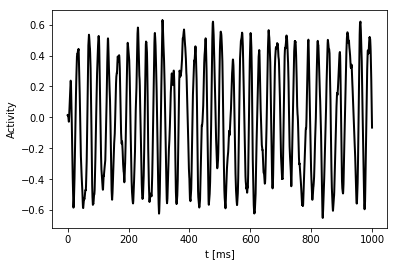

In [5]:
plt.plot(hopfModel.t, hopfModel.x.T, c='k', lw = 2)
# alternatively plot the results in the xarray:
# plt.plot(hopfModel.xr[0, 0].time, hopfModel.xr[0, 0].values)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

# Brain network

In [12]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [14]:
hopfModel = HopfModel(Cmat = ds.Cmat, Dmat = ds.Dmat, simulateChunkwise=False)

In [15]:
hopfModel.params['w'] = 1.0
hopfModel.params['signalV'] = 0
hopfModel.params['duration'] = 10 * 1000 
hopfModel.params['sigma_ou'] = 0.14
hopfModel.params['K_gl'] = 0.6

hopfModel.run()

Text(0.5, 0, 't [ms]')

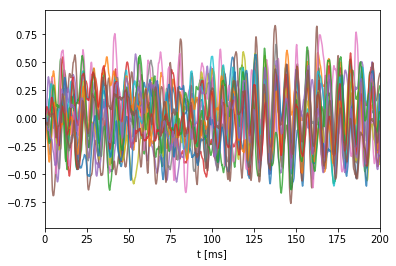

In [16]:
plt.plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

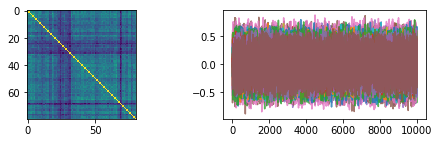

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(hopfModel.x[:, -10000:]))
axs[1].plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);

In [18]:
scores = []
for i in range(len(ds.FCs)):
    fc_score = func.matrix_correlation(func.fc(hopfModel.x[:, -int(5000/hopfModel.params['dt']):]), ds.FCs[i])
    scores.append(fc_score)
    print("Subject {}: {:.2f}". format(i, fc_score))
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Subject 0: 0.57
Subject 1: 0.47
Subject 2: 0.54
Subject 3: 0.49
Subject 4: 0.47
Subject 5: 0.42
Subject 6: 0.64
Subject 7: 0.52
Subject 8: 0.66
Subject 9: 0.61
Subject 10: 0.51
Subject 11: 0.49
Subject 12: 0.53
Subject 13: 0.45
Subject 14: 0.65
Subject 15: 0.56
Subject 16: 0.55
Subject 17: 0.44
Subject 18: 0.54
Subject 19: 0.57
Subject 20: 0.58
Subject 21: 0.58
Subject 22: 0.47
Subject 23: 0.62
Subject 24: 0.36
Subject 25: 0.47
Subject 26: 0.66
Subject 27: 0.48
Subject 28: 0.47
Subject 29: 0.51
Subject 30: 0.59
Subject 31: 0.48
Subject 32: 0.50
Subject 33: 0.67
Subject 34: 0.54
Subject 35: 0.47
Subject 36: 0.52
Subject 37: 0.54
Subject 38: 0.50
Subject 39: 0.50
Subject 40: 0.54
Subject 41: 0.59
Subject 42: 0.55
Subject 43: 0.55
Subject 44: 0.55
Subject 45: 0.60
Subject 46: 0.52
Subject 47: 0.49
Subject 48: 0.46
Subject 49: 0.49
Subject 50: 0.61
Subject 51: 0.63
Subject 52: 0.65
Subject 53: 0.60
Subject 54: 0.59
Subject 55: 0.68
Subject 56: 0.68
Subject 57: 0.56
Subject 58: 0.53
Subject